# Question 2 : Calculate the surface of the building exposed to sunlight?
# Assumption made:
# ---> Sun is always on the leftmost
# ----> All Buildings are on same level(datum), but with different heights
# ----->Source p height is the largest from the given ground level when comapred with the building heights

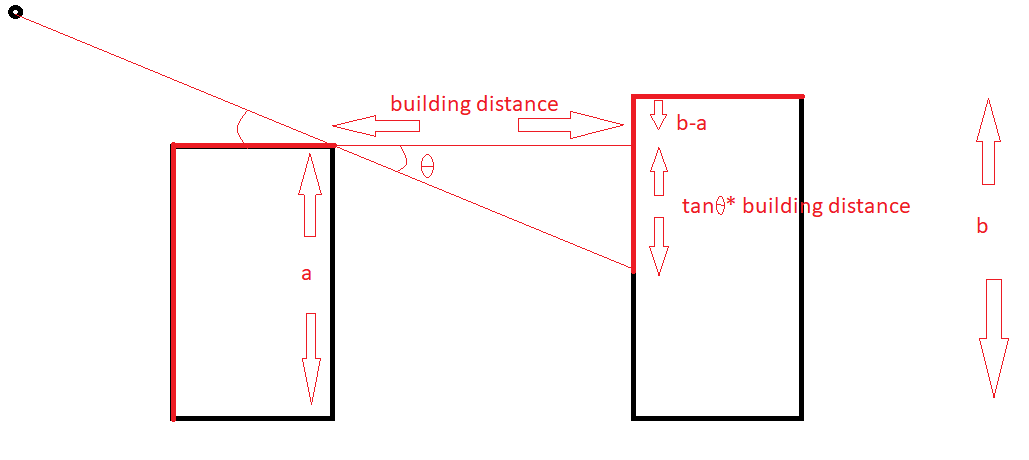

In [60]:
import math
def angles(a,b):       #a and b two lines with their coordinates function to calculate angle between two lines
    m1=(a[1][1]-a[0][1])/(a[1][0]-a[0][0])       #calculating slope
    m2=(b[1][1]-b[0][1])/(b[1][0]-b[0][0])         
    e=(m1-m2)/(1-(m1*m2))
    if e<0:
        return (math.atan(-e))          #finding angles between the line
    else:
        return (math.atan(e))
def distance(a,b):                                 #function to find the distance between two points
    return math.sqrt(((b[0]-a[0])**2)+((b[1]-a[1])**2))            #finding distance between two points using distance formula


#main function
questions=[[[[4,0],[4,-5],[7,-5],[7,0]]],[[[4,0],[4,-5],[7,-5],[7,0]], [[0.4,-2],[0.4,-5],[2.5,-5],[2.5,-2]]]]  #questions sets
case=1
for q in questions:
    Building_coordinates=q
    Building_coordinates.reverse()
    p=[-3.5,1]
    angles_at_rightTop_vertices=[]                 #angle subtended by the sun on the top surface of the each building
    for i in Building_coordinates:
        if(i[1][1]<i[0][1]):        #to sense  anticlockwise
            coord1=[i[3],p]
            coord2=[i[3],i[0]]
            angles_at_rightTop_vertices.append(angles(coord1,coord2))
        else:
            coord1=[i[2],p]       #to sense clockwise
            coord2=[i[2],i[1]]
            angles_at_rightTop_vertices.append(angles(coord1,coord2))
    Length_of_each_buildings=[]                           # length of each building
    for i in Building_coordinates:
        Length_of_each_buildings.append(distance(i[0],i[1]))
    e=distance(Building_coordinates[0][0],Building_coordinates[0][1])
    f=distance(Building_coordinates[0][1],Building_coordinates[0][2])    
    net_length=(e+f)
    count=0
    p=0
    for i in range(1,len(Length_of_each_buildings)):
        if Length_of_each_buildings[i]>Length_of_each_buildings[i-1]:             #if the building on left is taller than it 
            m=distance(Building_coordinates[i-1][0],Building_coordinates[i-1][1])  # 'won't get any sunlight
            e=distance(Building_coordinates[i][0],Building_coordinates[i][1])
            e=e-m
            f=distance(Building_coordinates[i][1],Building_coordinates[i][2])
            if(Building_coordinates[i][0][1]>Building_coordinates[i][1][1]):               #sensing given coordinates clockwise
                dist=distance(Building_coordinates[i-1][2],Building_coordinates[i][1])     #or anticlockwise
                p=(math.tan(angles_at_rightTop_vertices[count]))*dist
            else:
                dist=distance(Building_coordinates[i-1][3],Building_coordinates[i][0])
                p=(math.tan(angles_at_rightTop_vertices[count]))*dist
            net_length=net_length+(e+f+p)
        else:
            continue
    print('Case: ', case)                                    #printing each given case
    print(net_length, "units is exposed to sunlight")        #net length exposed to sunlight
    case+=1

Case:  1
8.0 units is exposed to sunlight
Case:  2
10.85 units is exposed to sunlight
